#**Análsis de Mercado de Ropa de Tallas Extra**.

En estos días, la capacidad de las redes neuronales convolucionales que aprenden la representación de imágenes de ropa utilizando técnicas de aprendizaje profundo ha creado un gran impacto en la clasificación de categorías y su atributo de predicción en el ámbito de la moda. Se ha demostrado repetidamente que las redes neuronales profundas pueden lograr un rendimiento superior a los métodos tradicionales.
En esta parte se buscara facilitar el proceso de alta de productos de manera automatizada en un punto de venta basando en una clasificación programada, mediante el procesamiento de imágenes y redes neuronales, permitiéndole al Usuario poder ordenar sus productos por categoría de manera autónoma.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1ijQ4b2bzkBR8L0fxwIjlBBJ9l4N2nz7h?usp=sharing#scrollTo=yzuuTJStdvqz"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Analisis:Mercado de Ropa Tallas Extra</a>
  </td>
   <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Calculadora de tallas</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />REPOSITORIO</a>
  </td>
</table>

# **"Clasificador de Ropa"**


Se entrenará un modelo de red neuronal para clasificar imagenes de ropa.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [ ]:
#%pip install plotly
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Importar el set de datos de moda de MNIST


Esta guía utiliza el conjunto de datos Fashion MNIST. Las fotos muestran prendas individuales en baja resolución (28 por 28 píxeles), se utilizan 60.000 imágenes para entrenar redes neuronales.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Si se craga el documento devolvera cuatro arreglos en NumPy:

* Los parámetros "train_images" y "train_labels" son los arreglos que *training set*
* El modelo se probara con los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes con un números de píxeles de 0 a 255 .Los Labels son un arreglo, que van de 0 a 9, que corresponderan a cada una de las class de ropa que se muestran a continuacion.

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat             
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

Cada imagen es mapeada a un unico Label, los *Class names* no estan incluidos en el dataset,se procede a  almacenararlos para su uso posterior:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Set de datos

Se tienen 60.000 imágenes, que se muestran en imágenes de 28x28 pixeles :

In [ ]:
train_images.shape

(60000, 28, 28)

Se tienen 60,000 Labels en el set de entrenamiento:



In [ ]:
len(train_labels)

60000

Cada "Label" es un integro entre 0 y 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

La muestra de prueba contiene 10,000 imágenes.

In [ ]:
test_images.shape

(10000, 28, 28)

Asi mismo son 10,000 Labels de imagen que tiene el set.

In [ ]:
len(test_labels)

10000

## Pre-procese el set de datos
Antes de que pueda entrenar la red, la set de datos de entrenamiento debe estar pre-procesado. Si observa la primera del set, verá que el valor de píxel cae de 0 a 255:


Se escala estos valores en un rango de 0 a 1 antes de alimentarlos en nuestro  modelo de la red neuronal,se dividiran los valores por 255. 

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Se va a verificar que el set de datos esta en el formato adecuado , en otras palabras que estan listos para construir y entrenar la red, se van a desplegar las primeras 30 imagenes de el *training set* , a continuacion se desplegaran el nombre de cada clase/categoria debajo de cada imagen .

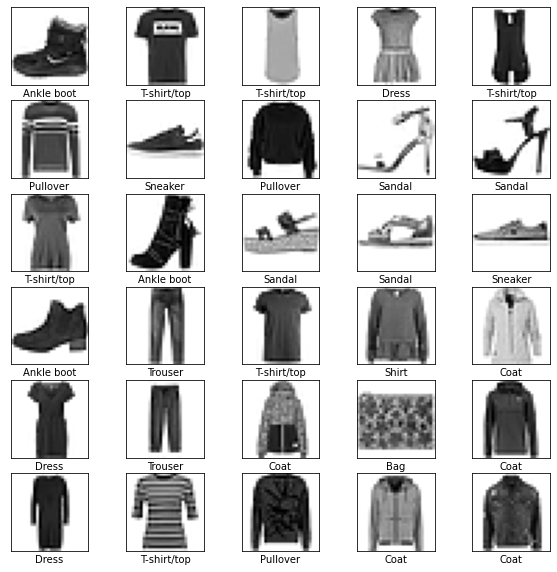

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construcción del Modelo

Para poder contruir una red neuronal por lo cual se requiere primero el configurar capas del modelo y luego compilar el modelo.

### Configuración de las Capas
En una red neuronal los bloques de construcción básicos las "*capas*" extraen representaciones de el set de datos.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles).

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas,a primera capa `Dense` tiene 128  neuronas y la segunda es una capa de 10 neuronas *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. 

* *Cada neurona/nodo contiene una calificacion que va a indicar la probabilidad que la actual imagen pertenece a una de las 10 categorias*

### Compilación del Modelo

Antes de entrenar la red se realizaran algunas configuraciones:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. 
* *Optimizer* — El modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


<table>
  <tr>
    <th>Configuración</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>*Loss function* </td>
    <td>Esto mide que tan exacto es el modelo durante el entrenamiento. </td>
  </tr>
  <tr>
    <td>*Optimizer*</td>
    <td>El modelo se actualiza basado en el set de datos que ve y la funcion de perdida.</td>
  </tr>
    <tr>
    <td>*Metrics*</td>
    <td>Se usan para monitorear los pasos de entrenamiento y de pruebas.</td>
  </tr>
  </tr>
</table>

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

Para comenzar a entrenar la Red Neuronal se llamara a el metodo `model.fit`, que ajustara el modelo a el set de datos de entrenamiento,se observa que conforme el modelo va entrenando, la perdida y la exactitud son desplegadas:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4966 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2957 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2586 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

## Evaluación de la Exactitud del Modelo

Se xomparara el rendimiento del modelo sobre el set de datos:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3534 - accuracy: 0.8727

Test accuracy: 0.8726999759674072


Se muestra una diferencia  de exactitud de la set de datos y el set de entrenamiento esta diferencia se debe a overfitting que sucede cuando el modelo de aprendizaje tiene un rendimiento mas bajo sobre un set de datos.

## Predicciones del Modelo



In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([5.2132264e-06, 3.0483797e-08, 3.4474542e-08, 8.4667114e-08,
       2.2118219e-07, 1.8064800e-03, 5.1292709e-08, 1.4812163e-01,
       2.0868570e-06, 8.5006416e-01], dtype=float32)

Nuestra prediccion sera un arreglo de 10 numeros que van a representar el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 categorias. 

In [ ]:
np.argmax(predictions[0])

9

El modelo presenta un mayor grado de confianza en la imagen "ankle boot" o `class_names[9]` y al examinar los Labels de prueba se muestra correcta esta predicción.

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Al ver la imagen [0], sus predicciones y el arreglo de predicciones. Los Labels de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para el label que sera predecido.

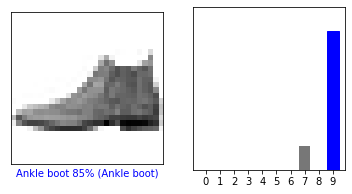

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

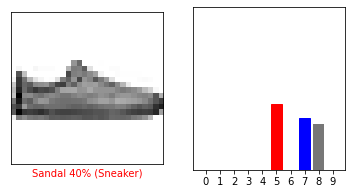

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora se va a graficar multiples imagenes con sus predicciones para su clasificación. 

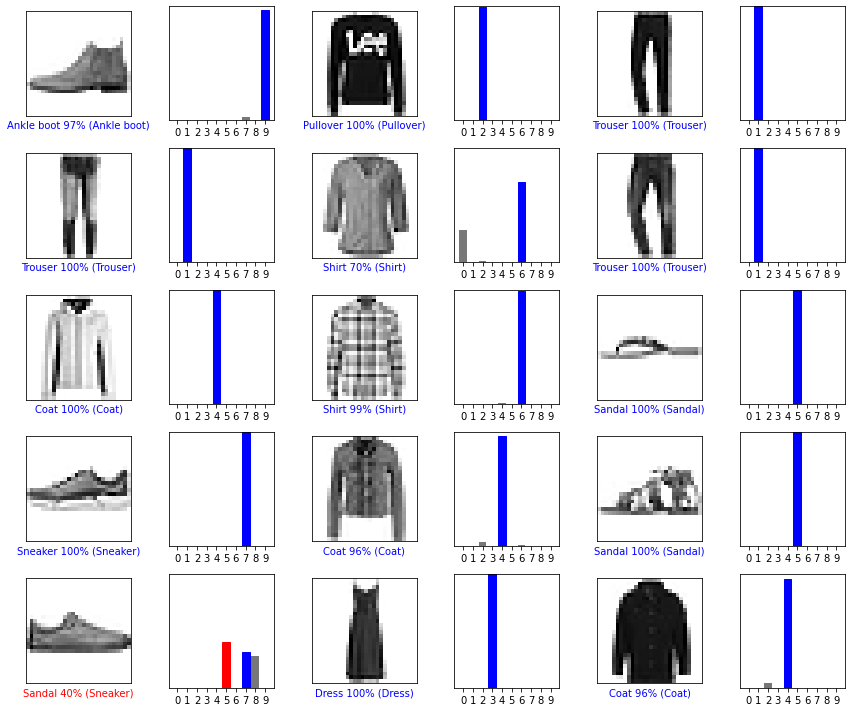

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Se usara el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques.

In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Se va a predecir el label/categoria correcta para esta imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3780217e-04 1.5211401e-13 9.9814284e-01 1.1916618e-08 3.4777392e-04
  5.6512345e-10 1.3715214e-03 3.7164285e-13 1.7567135e-08 5.8344133e-15]]


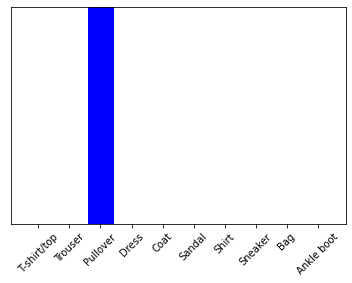

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` va a retornar una lista para cada imagen dentro del *batch* o bloque de datos , prediciendo asi su categoria o label. En esta ocasion el modelo predice la categoria "2".

In [ ]:
np.argmax(predictions_single[0])

2